<a href="https://colab.research.google.com/github/dau-J/ML-Machine-Learning-/blob/main/MLP_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as dataset
import torchvision.transforms as transform
from torch.utils.data import DataLoader

In [2]:
# 데이터 증강 및 변환 적용
transform_train = transform.Compose([
    transform.RandomHorizontalFlip(),
    transform.RandomCrop(32, padding=4),
    transform.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transform.ToTensor(),
    transform.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

transform_test = transform.Compose([
    transform.ToTensor(),
    transform.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# CIFAR-10 데이터셋 다운로드
cifar10_train = dataset.CIFAR10(root='./', train=True, transform=transform_train, download=True)
cifar10_test = dataset.CIFAR10(root='./', train=False, transform=transform_test, download=True)


100%|██████████| 170M/170M [00:03<00:00, 43.1MB/s]


In [3]:
# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        input_size = 3 * 32 * 32
        hidden_size1 = 3072  # 더 많은 뉴런 수
        hidden_size2 = 2048
        hidden_size3 = 1024
        hidden_size4 = 512

        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, hidden_size4)
        self.fc5 = nn.Linear(hidden_size4, 10)  # CIFAR-10 클래스는 10개

        self.dropout = nn.Dropout(0.5)  # 드롭아웃 추가
        self.bn1 = nn.BatchNorm1d(hidden_size1)  # 배치 정규화 추가
        self.bn2 = nn.BatchNorm1d(hidden_size2)  # 배치 정규화 추가
        self.bn3 = nn.BatchNorm1d(hidden_size3)  # 배치 정규화 추가
        self.bn4 = nn.BatchNorm1d(hidden_size4)  # 배치 정규화 추가

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)  # 이미지 평탄화
        x = self.dropout(F.relu(self.bn1(self.fc1(x))))  # ReLU + 배치 정규화 + 드롭아웃
        x = self.dropout(F.relu(self.bn2(self.fc2(x))))
        x = self.dropout(F.relu(self.bn3(self.fc3(x))))
        x = self.dropout(F.relu(self.bn4(self.fc4(x))))
        x = self.fc5(x)
        return x

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
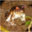

In [4]:
cifar10_train.data[0]

In [5]:
# 하이퍼파라미터 설정
batch_size = 128  # 배치 크기를 늘려 더 빠른 학습
learning_rate = 0.001  # 학습률 줄임
training_epochs = 30  # 에포크 수 증가
loss_function = nn.CrossEntropyLoss()

# 모델 및 옵티마이저 설정
network = MLP()
optimizer = torch.optim.Adam(network.parameters(), lr=learning_rate)

# DataLoader 설정
data_loader = DataLoader(dataset=cifar10_train, batch_size=batch_size, shuffle=True, drop_last=True)

# CUDA 사용 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
network = network.to(device)

In [6]:
# 모델 학습
network.train()
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for img, label in data_loader:
        img = img.to(device)
        label = label.to(device)

        pred = network(img)
        loss = loss_function(pred, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        avg_cost += loss / total_batch

    print(f'Epoch: {epoch+1}, Loss: {avg_cost}')

print('Training Finished')

Epoch: 1, Loss: 1.952556848526001
Epoch: 2, Loss: 1.7784817218780518
Epoch: 3, Loss: 1.7108030319213867
Epoch: 4, Loss: 1.67183256149292
Epoch: 5, Loss: 1.634385108947754
Epoch: 6, Loss: 1.6097798347473145
Epoch: 7, Loss: 1.5892051458358765
Epoch: 8, Loss: 1.5729529857635498
Epoch: 9, Loss: 1.5545059442520142
Epoch: 10, Loss: 1.54592764377594
Epoch: 11, Loss: 1.534165859222412
Epoch: 12, Loss: 1.5199263095855713
Epoch: 13, Loss: 1.5102980136871338
Epoch: 14, Loss: 1.495772361755371
Epoch: 15, Loss: 1.492065668106079
Epoch: 16, Loss: 1.4813276529312134
Epoch: 17, Loss: 1.4682332277297974
Epoch: 18, Loss: 1.457932710647583
Epoch: 19, Loss: 1.4514366388320923
Epoch: 20, Loss: 1.4473648071289062
Epoch: 21, Loss: 1.436969518661499
Epoch: 22, Loss: 1.4337468147277832
Epoch: 23, Loss: 1.4276410341262817
Epoch: 24, Loss: 1.4167898893356323
Epoch: 25, Loss: 1.4130632877349854
Epoch: 26, Loss: 1.4089136123657227
Epoch: 27, Loss: 1.4007443189620972
Epoch: 28, Loss: 1.3943781852722168
Epoch: 29, L

In [7]:
# 모델 평가 (테스트)
network.eval()
with torch.no_grad():
    test_loader = DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)
    correct = 0
    total = 0
    for img_test, label_test in test_loader:
        img_test = img_test.to(device)
        label_test = label_test.to(device)

        outputs = network(img_test)
        _, predicted = torch.max(outputs, 1)
        total += label_test.size(0)
        correct += (predicted == label_test).sum().item()

    accuracy = correct / total
    print('Accuracy:', accuracy)

Accuracy: 0.5603
